### Data Cleaning

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re
from numpy.random import normal
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, mean_squared_error, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('UCI_Credit_Card.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df = df.rename(columns={'default.payment.next.month': 'default_payment_next_month'})
df = df.drop(['ID'], axis=1)

### 1. Linear Model

#### Statsmodels

In [5]:
#Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
#Build regression model 

outcome='default_payment_next_month'
cols=[col for col in df.columns]
cols.remove('default_payment_next_month')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     default_payment_next_month   R-squared:                       0.124
Model:                                    OLS   Adj. R-squared:                  0.123
Method:                         Least Squares   F-statistic:                     184.5
Date:                        Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                                17:00:49   Log-Likelihood:                -14202.
No. Observations:                       30000   AIC:                         2.845e+04
Df Residuals:                           29976   BIC:                         2.865e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3142      0.018     17.541      0.000       0.279       0.349
LIMIT_BAL  -9.053e-08   2.16e-08     -4.193      0.000   -1.33e-07   -4.82e-08
SEX           -0.0145      0.005     -3.130      0.002      -0.024      -0.005
EDUCATION     -0.0151      0.003     -5.022      0.000      -0.021      -0.009
MARRIAGE      -0.0238      0.005     -4.996      0.000      -0.033      -0.014
AGE            0.0014      0.000      5.128      0.000       0.001       0.002
PAY_0          0.0957      0.003     34.596      0.000       0.090       0.101
PAY_2          0.0195      0.003      5.828      0.000       0.013       0.026
PAY_3          0.0117      0.004      3.256      0.001       0.005       0.019
PAY_4          0.0034      0.004      0.846      0.398      -0.004       0.011
PAY_5          0.0057      0.004      1.324      0.185      -0.003       0.014
PAY_6          0.0008      0.004      0.225      0.822      -0.006       0.008
BILL_AMT1  -6.225e-07   1.14e-07     -5.453      0.000   -8.46e-07   -3.99e-07
BILL_AMT2   1.587e-07    1.6e-07      0.990      0.322   -1.56e-07    4.73e-07
BILL_AMT3   3.005e-08   1.51e-07      0.199      0.842   -2.66e-07    3.26e-07
BILL_AMT4  -6.793e-08   1.57e-07     -0.432      0.666   -3.76e-07     2.4e-07
BILL_AMT5  -2.049e-08   1.85e-07     -0.111      0.912   -3.82e-07    3.41e-07
BILL_AMT6   1.153e-07   1.46e-07      0.789      0.430   -1.71e-07    4.02e-07
PAY_AMT1   -7.437e-07   1.77e-07     -4.201      0.000   -1.09e-06   -3.97e-07
PAY_AMT2   -2.092e-07   1.46e-07     -1.436      0.151   -4.95e-07    7.63e-08
PAY_AMT3   -2.874e-08   1.69e-07     -0.170      0.865    -3.6e-07    3.02e-07
PAY_AMT4   -2.521e-07   1.84e-07     -1.371      0.170   -6.13e-07    1.08e-07
PAY_AMT5    -3.41e-07   1.91e-07     -1.787      0.074   -7.15e-07     3.3e-08
PAY_AMT6    -9.77e-08   1.37e-07     -0.716      0.474   -3.65e-07     1.7e-07
==============================================================================
Omnibus:                     4682.286   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7285.821
Skew:                           1.204   Prob(JB):                         0.00
Kurtosis:                       3.178   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#Train-Test-Split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
#Fit the model on the train data
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     default_payment_next_month   R-squared:                       0.125
Model:                                    OLS   Adj. R-squared:                  0.124
Method:                         Least Squares   F-statistic:                     149.1
Date:                        Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                                17:00:49   Log-Likelihood:                -11369.
No. Observations:                       24000   AIC:                         2.279e+04
Df Residuals:                           23976   BIC:                         2.298e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3098      0.020     15.446      0.000       0.270       0.349
LIMIT_BAL  -9.692e-08   2.42e-08     -4.009      0.000   -1.44e-07   -4.95e-08
SEX           -0.0158      0.005     -3.043      0.002      -0.026      -0.006
EDUCATION     -0.0146      0.003     -4.352      0.000      -0.021      -0.008
MARRIAGE      -0.0229      0.005     -4.298      0.000      -0.033      -0.012
AGE            0.0016      0.000      5.084      0.000       0.001       0.002
PAY_0          0.0952      0.003     30.735      0.000       0.089       0.101
PAY_2          0.0206      0.004      5.489      0.000       0.013       0.028
PAY_3          0.0110      0.004      2.715      0.007       0.003       0.019
PAY_4          0.0067      0.004      1.505      0.132      -0.002       0.015
PAY_5          0.0029      0.005      0.595      0.552      -0.007       0.012
PAY_6          0.0019      0.004      0.483      0.629      -0.006       0.010
BILL_AMT1  -6.045e-07   1.28e-07     -4.722      0.000   -8.55e-07   -3.54e-07
BILL_AMT2    1.63e-07   1.81e-07      0.902      0.367   -1.91e-07    5.17e-07
BILL_AMT3    4.47e-08   1.69e-07      0.265      0.791   -2.86e-07    3.75e-07
BILL_AMT4  -1.577e-07   1.73e-07     -0.909      0.363   -4.98e-07    1.82e-07
BILL_AMT5   -9.44e-09   2.07e-07     -0.046      0.964   -4.15e-07    3.97e-07
BILL_AMT6   1.179e-07   1.66e-07      0.712      0.477   -2.07e-07    4.43e-07
PAY_AMT1   -5.985e-07   1.94e-07     -3.083      0.002   -9.79e-07   -2.18e-07
PAY_AMT2   -2.075e-07    1.6e-07     -1.299      0.194   -5.21e-07    1.06e-07
PAY_AMT3    7.262e-08   1.86e-07      0.390      0.697   -2.92e-07    4.38e-07
PAY_AMT4   -2.295e-07   1.99e-07     -1.152      0.250    -6.2e-07    1.61e-07
PAY_AMT5   -1.895e-07    2.1e-07     -0.902      0.367   -6.01e-07    2.22e-07
PAY_AMT6   -1.375e-07   1.55e-07     -0.886      0.375   -4.42e-07    1.67e-07
==============================================================================
Omnibus:                     3750.617   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5836.711
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       3.182   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Predict the model using the test data 
y_hat_test = model.predict(test)
y_test = test['default_payment_next_month']

#Do the same for the train data
y_hat_train = model.predict(train)
y_train = train['default_payment_next_month']

In [10]:
#Evaluate the model using MSE and RMSE
mse_test = mean_squared_error(y_hat_test, y_test)
mse_train = mean_squared_error(y_hat_train, y_train)

print('Train Mean squared error: ', mse_train)
print('Test Mean squared error: ', mse_test)
print('Train RMSE: ', np.sqrt(mse_train))
print('Test RMSE: ', np.sqrt(mse_test))

Train Mean squared error:  0.1509996248474726
Test Mean squared error:  0.15066548456702586
Train RMSE:  0.38858670184075084
Test RMSE:  0.3881565207065648


### 2. Logistic Model

In [11]:
#Look at our data again 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [12]:
#Create dummy variables
relevant_columns = ['default_payment_next_month', 'LIMIT_BAL', 'SEX', 'EDUCATION', 
                    'MARRIAGE', 'AGE', 'PAY_0','BILL_AMT1', 'PAY_AMT1']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

In [13]:
#split X and Y
y_new = dummy_dataframe['default_payment_next_month']
X_new = dummy_dataframe.drop(columns=['default_payment_next_month'], axis=1)

In [14]:
#Fill NA values
X_new = X_new.fillna(value=0)

#Normalize the data
for col in X_new.columns:
    X_new[col] = (X_new[col] - min(X_new[col]))/ (max(X_new[col]) - min(X_new[col])) 

In [15]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=0)

In [16]:
#Instantiate the classifier 
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

In [17]:
#Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [18]:
#Make predictions 

y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [19]:
#Check when model is correct on training set 

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))


0    18002
1     4498
Name: default_payment_next_month, dtype: int64
0    0.800089
1    0.199911
Name: default_payment_next_month, dtype: float64


Result for train set shows that 18,002 values are correct with approximately 80% accuracy.

In [20]:
#Check when model is correct on test set

residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    6071
1    1429
Name: default_payment_next_month, dtype: int64
0    0.809467
1    0.190533
Name: default_payment_next_month, dtype: float64


Result for test set shows that 6071 values are correct with approximately 81% accuracy.

#### Evaluation Metrics

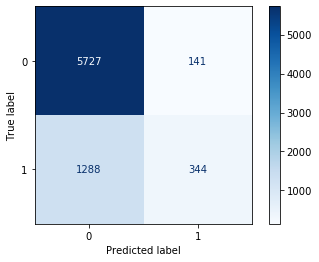

In [21]:
#Look at confusion matrix for test set 

plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [22]:
#Look at precision score
prec_train = precision_score(y_train, y_hat_train)
prec_test = precision_score(y_test, y_hat_test)

print(prec_train)
print(prec_test)

0.672108843537415
0.709278350515464


In [23]:
#Look at recall score
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)

print(recall_train)
print(recall_test)

0.19744204636290968
0.2107843137254902


In [24]:
#Look at accuracy score
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)

print(accuracy_train)
print(accuracy_test)

0.8000888888888888
0.8094666666666667


In [25]:
#Look at F1 score 
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

print(f1_train)
print(f1_test)

0.30522088353413657
0.32498819083608876


In [26]:
#Put it all together: print classification reports

print(classification_report(y_train, y_hat_train))
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17496
           1       0.67      0.20      0.31      5004

    accuracy                           0.80     22500
   macro avg       0.74      0.58      0.59     22500
weighted avg       0.78      0.80      0.75     22500

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.71      0.21      0.32      1632

    accuracy                           0.81      7500
   macro avg       0.76      0.59      0.61      7500
weighted avg       0.79      0.81      0.77      7500



In [27]:
#Build ROC curve

y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.7114991307958084


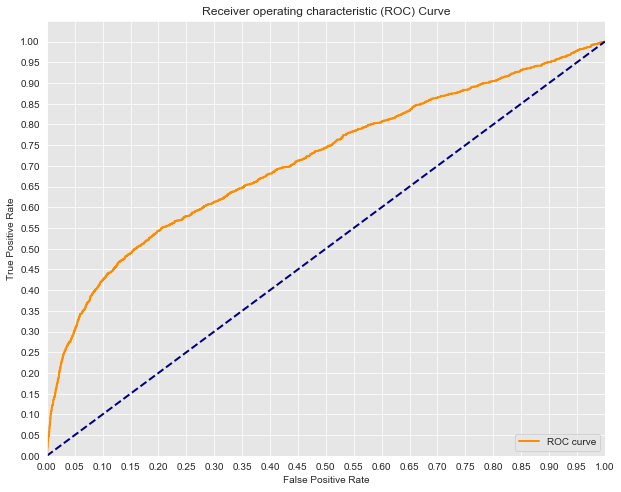

In [28]:
#Show ROC graph

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC is 0.71 which is average. As shown in the graph above, imporvements to our model could move our ROC curve closer to the top left corner. 

### 3. KNN Model

In [29]:
#Set X and Y
y = dummy_dataframe['default_payment_next_month']
X = dummy_dataframe.drop(columns=['default_payment_next_month'], axis=1)

In [30]:
#Train test split, then Scale and Transform 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [31]:
#Fit and predict the model

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

In [32]:
#Print classification report 
print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18701
           1       1.00      1.00      1.00      5299

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4663
           1       0.38      0.38      0.38      1337

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000



#### Hypertuning to find optimal value of K 

In [33]:
#Define function 
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=35):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [34]:
#Find optimal K for our dataset 
find_best_k(X_train, y_train, X_test, y_test)


Best Value for k: 19
F1-Score: 0.4384537131230926


In [35]:
#redo model fit with K=19 

model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     18701
           1       0.70      0.34      0.46      5299

    accuracy                           0.82     24000
   macro avg       0.77      0.65      0.68     24000
weighted avg       0.81      0.82      0.80     24000

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.69      0.32      0.44      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



### 4. Bayes Classification Model